In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#from statannot import add_stat_annotation
from statannotations.Annotator import Annotator

In [4]:
import datetime as dt

# Body Weights
#### indirect proxy for overall health

In [5]:
weights = pd.read_csv('../data/Physiological/weights_pythonformat_add.csv', 
                      parse_dates=['specific_date', 'J1_arrival_date'])
weights

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy
0,Reba,Oct,2020,22-Oct,545,2020-10-21,NaN,female,2020-10-21,external,NaN
1,Reba,Nov,2020,22-Nov,480,2020-11-20,NaN,female,2020-10-21,external,NaN
2,Reba,Jan,2021,22-Jan,420,2021-01-12,NaN,female,2020-10-21,external,NaN
3,Reba,Mar,2021,22-Mar,424,2021-03-09,NaN,female,2020-10-21,external,NaN
4,Reba,Apr,2021,22-Apr,440,2021-04-06,NaN,female,2020-10-21,external,NaN
...,...,...,...,...,...,...,...,...,...,...,...
301,Willie,Feb,2022,22-Feb,406,2022-02-04,NaN,male,2020-10-21,transfer,NaN
302,Willie,Apr,2022,22-Apr,452,2022-04-04,NaN,male,2020-10-21,transfer,NaN
303,Willie,Jun,2022,22-Jun,466,2022-06-09,NaN,male,2020-10-21,transfer,NaN
304,Willie,Aug,2022,22-Aug,436,2022-08-08,NaN,male,2020-10-21,transfer,NaN


In [5]:
weights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             306 non-null    object        
 1   month            306 non-null    object        
 2   year             306 non-null    int64         
 3   date             306 non-null    object        
 4   weight_g         306 non-null    int64         
 5   specific_date    306 non-null    datetime64[ns]
 6   marmo_birthday   178 non-null    object        
 7   sex              306 non-null    object        
 8   J1_arrival_date  306 non-null    datetime64[ns]
 9   group            306 non-null    object        
 10  pregnancy        32 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 26.4+ KB


In [54]:
weights.group.unique()

array(['external', 'internal', 'transfer'], dtype=object)

In [55]:
weights.group.value_counts()

internal    178
external     72
transfer     56
Name: group, dtype: int64

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

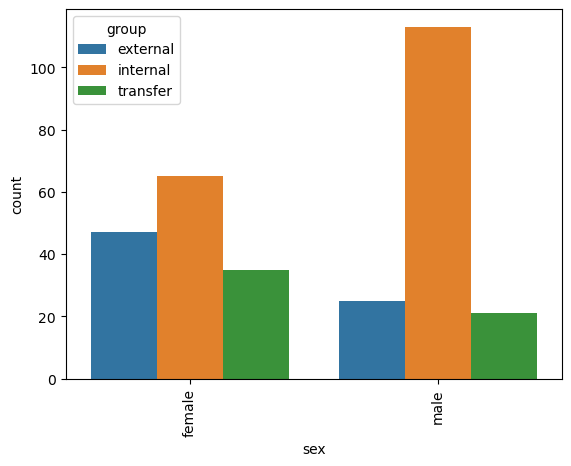

In [56]:
sns.countplot(data=weights, x='sex', hue='group')
plt.xticks(rotation=90)

In [7]:
weights[weights['sex']=='female'].name.unique()

array(['Reba', 'Asami', 'Toph', 'Ellen', 'Rene', 'Tammy', 'Martina',
       'Gadget', 'Dolly', 'Loretta'], dtype=object)

In [8]:
weights.columns

Index(['name', 'month', 'year', 'date', 'weight_g', 'specific_date',
       'marmo_birthday', 'sex', 'J1_arrival_date', 'group', 'pregnancy'],
      dtype='object')

In [6]:
weights['start_transition_date'] = "2021-06-17"
weights['start_transition_date'] = pd.to_datetime(weights['start_transition_date'])
#weights['specific_date'] = pd.to_datetime(weights['specific_date'])
#weights['J1_arrival_date'] = pd.to_datetime(weights['J1_arrival_date'])

In [7]:
weights.dtypes

name                             object
month                            object
year                              int64
date                             object
weight_g                          int64
specific_date            datetime64[ns]
marmo_birthday                   object
sex                              object
J1_arrival_date          datetime64[ns]
group                            object
pregnancy                        object
start_transition_date    datetime64[ns]
dtype: object

In [8]:
weights['days_from_arrival'] = (weights['specific_date'] - weights['J1_arrival_date']).dt.days

In [9]:
weights.head()

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival
0,Reba,Oct,2020,22-Oct,545,2020-10-21,NaN,female,2020-10-21,external,NaN,2021-06-17,0
1,Reba,Nov,2020,22-Nov,480,2020-11-20,NaN,female,2020-10-21,external,NaN,2021-06-17,30
2,Reba,Jan,2021,22-Jan,420,2021-01-12,NaN,female,2020-10-21,external,NaN,2021-06-17,83
3,Reba,Mar,2021,22-Mar,424,2021-03-09,NaN,female,2020-10-21,external,NaN,2021-06-17,139
4,Reba,Apr,2021,22-Apr,440,2021-04-06,NaN,female,2020-10-21,external,NaN,2021-06-17,167


In [13]:
weights.name.unique()

array(['Reba', 'Chrome', 'Asami', 'Beryl', 'Toph', 'Kenny', 'Ellen',
       'Mac', 'Johnny', 'Rene', 'Tammy', 'Bane', 'Martina', 'Abel',
       'Gadget', 'Kirk', 'Dolly', 'Loretta', 'Willie'], dtype=object)

In [14]:
weights.sex.unique()

array(['female', 'male'], dtype=object)

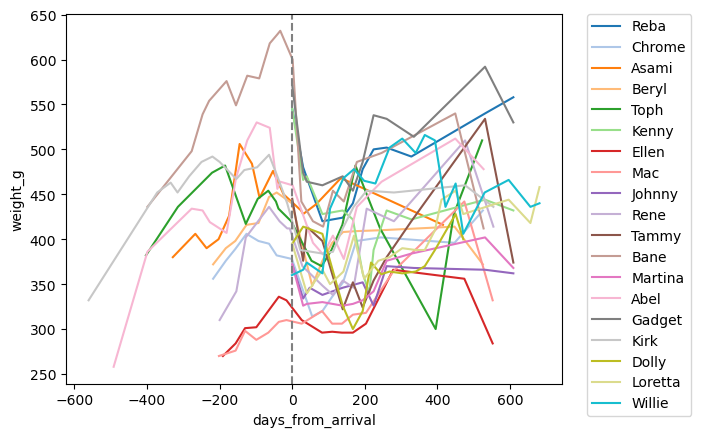

In [15]:
sns.lineplot(data=weights, x='days_from_arrival', y='weight_g', hue='name', palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
plt.axvline(0, color='grey', linestyle='--') #arrival at J1
plt.savefig('../figures/weights_from_arrival.svg', dpi=150, bbox_inches='tight')

In [16]:
weights['days_from_transition_start'] = (weights['specific_date'] - weights['start_transition_date']).dt.days

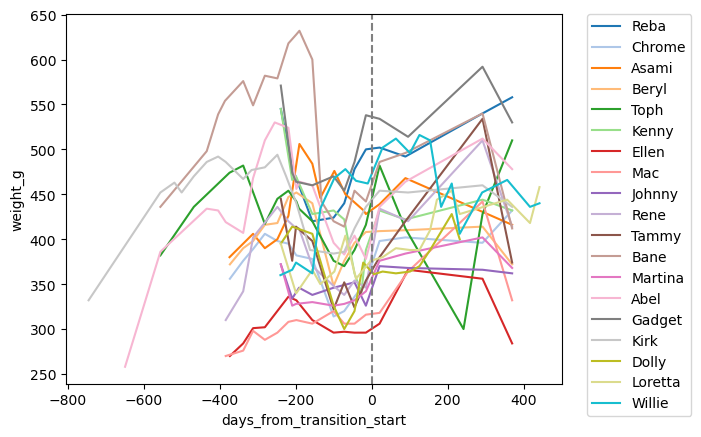

In [17]:
sns.lineplot(data=weights, x='days_from_transition_start', y='weight_g', hue='name', palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
plt.axvline(0, color='grey', linestyle='--') #start diet transition
plt.savefig('../figures/weights_from_transition_start.svg', dpi=150, bbox_inches='tight')

### standardize date

In [10]:
weights['stupid_date'] = weights['month'].astype('str')+"_"+weights['year'].astype('str')
weights

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,stupid_date
0,Reba,Oct,2020,22-Oct,545,2020-10-21,NaN,female,2020-10-21,external,NaN,2021-06-17,0,Oct_2020
1,Reba,Nov,2020,22-Nov,480,2020-11-20,NaN,female,2020-10-21,external,NaN,2021-06-17,30,Nov_2020
2,Reba,Jan,2021,22-Jan,420,2021-01-12,NaN,female,2020-10-21,external,NaN,2021-06-17,83,Jan_2021
3,Reba,Mar,2021,22-Mar,424,2021-03-09,NaN,female,2020-10-21,external,NaN,2021-06-17,139,Mar_2021
4,Reba,Apr,2021,22-Apr,440,2021-04-06,NaN,female,2020-10-21,external,NaN,2021-06-17,167,Apr_2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Willie,Feb,2022,22-Feb,406,2022-02-04,NaN,male,2020-10-21,transfer,NaN,2021-06-17,471,Feb_2022
302,Willie,Apr,2022,22-Apr,452,2022-04-04,NaN,male,2020-10-21,transfer,NaN,2021-06-17,530,Apr_2022
303,Willie,Jun,2022,22-Jun,466,2022-06-09,NaN,male,2020-10-21,transfer,NaN,2021-06-17,596,Jun_2022
304,Willie,Aug,2022,22-Aug,436,2022-08-08,NaN,male,2020-10-21,transfer,NaN,2021-06-17,656,Aug_2022


In [11]:
spag_weights = weights[weights['stupid_date'].isin(['Oct_2020', 'Apr_2021', 'Apr_2022'])].copy()
spag_weights['stupid_date'] = pd.Categorical(spag_weights['stupid_date'], ['Oct_2020', 'Apr_2021', 'Apr_2022'])

In [12]:
spag_weights.head()

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,stupid_date
0,Reba,Oct,2020,22-Oct,545,2020-10-21,NaN,female,2020-10-21,external,NaN,2021-06-17,0,Oct_2020
4,Reba,Apr,2021,22-Apr,440,2021-04-06,NaN,female,2020-10-21,external,NaN,2021-06-17,167,Apr_2021
9,Reba,Apr,2022,22-Apr,540,2022-04-05,NaN,female,2020-10-21,external,NaN,2021-06-17,531,Apr_2022
15,Chrome,Oct,2020,22-Oct,398,2020-10-12,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,-93,Oct_2020
20,Chrome,Apr,2021,22-Apr,320,2021-04-06,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,83,Apr_2021


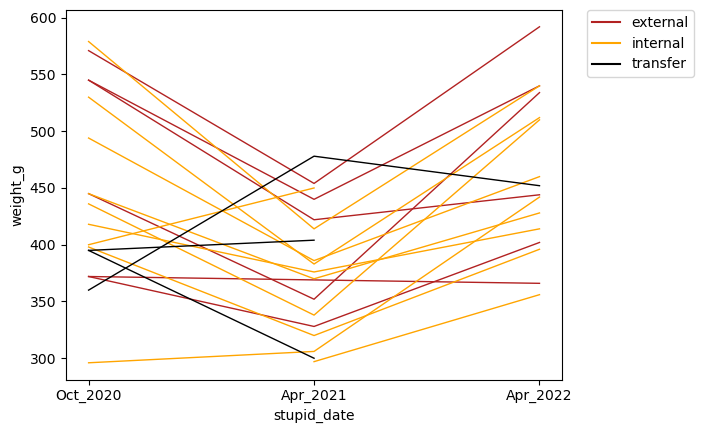

In [21]:
sns.lineplot(data=spag_weights, x='stupid_date', y='weight_g', hue='group', 
             palette=['firebrick', 'orange', 'black'], 
            units="name", estimator=None, lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

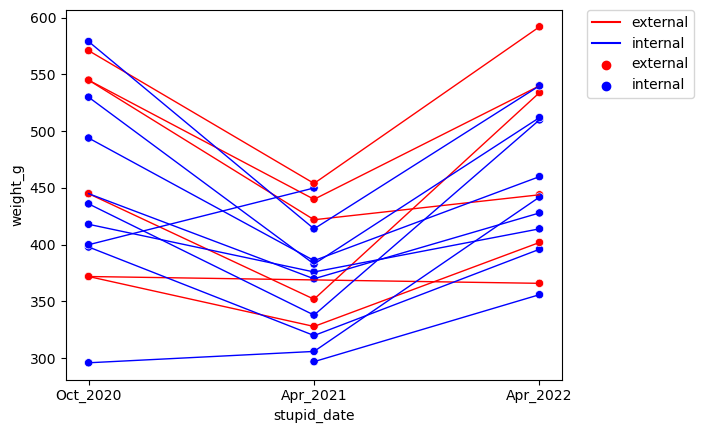

In [22]:
sns.lineplot(data=spag_weights[spag_weights['group']!='transfer'], 
             x='stupid_date', y='weight_g', hue='group', 
             palette=['red', 'blue'], 
            units="name", estimator=None, lw=1)
sns.scatterplot(data=spag_weights[spag_weights['group']!='transfer'], 
                x='stupid_date', y='weight_g', hue='group', 
             palette=['red', 'blue'], 
            units="name", estimator=None, lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
#plt.xticks(['Arrival', 'Before Diet Change', 'After Diet Change']) #make these labels in inkscape
plt.rcParams['svg.fonttype'] = 'none' #makes text editable in inkscape
plt.savefig('../figures/weights_3tp_spagplot.svg', dpi=150, bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Oct_2020 vs. Apr_2021: Mann-Whitney-Wilcoxon test two-sided, P_val:1.279e-02 U_stat=1.730e+02
Apr_2021 vs. Apr_2022: Mann-Whitney-Wilcoxon test two-sided, P_val:2.631e-03 U_stat=3.950e+01


(<AxesSubplot: xlabel='stupid_date', ylabel='weight_g'>,
  <statannotations.Annotation.Annotation at 0x7fa3d9a9e160>])

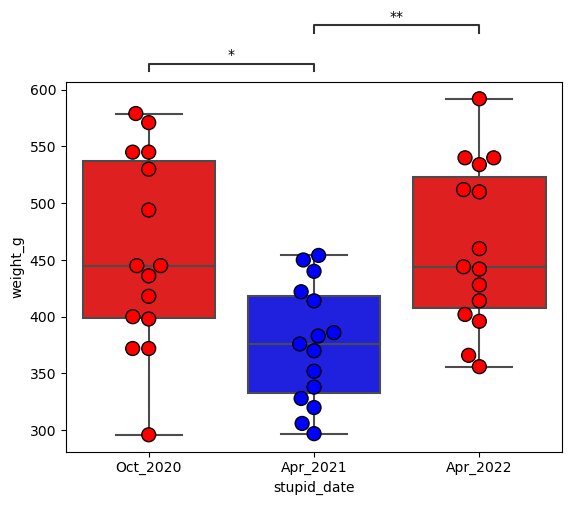

In [27]:
g = sns.boxplot(data=spag_weights[spag_weights['group']!='transfer'], 
                x='stupid_date', y='weight_g', 
             palette=['red', 'blue'])
g = sns.swarmplot(data=spag_weights[spag_weights['group']!='transfer'], 
                  x='stupid_date', y='weight_g', s=10, edgecolor='k', linewidth=1,
             palette=['red', 'blue'], dodge=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
#add_stat_annotation(g, data=spag_weights[spag_weights['group']!='transfer'], 
#                    x='stupid_date', y='weight_g',
#                    box_pairs=[ ('Oct_2020', 'Apr_2021'),('Apr_2021', 'Apr_2022')],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
pairs=[('Oct_2020', 'Apr_2021'),('Apr_2021', 'Apr_2022')]
annotator = Annotator(g, pairs, data=spag_weights[spag_weights['group']!='transfer'], 
                      x='stupid_date', y='weight_g',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annotator.apply_and_annotate()

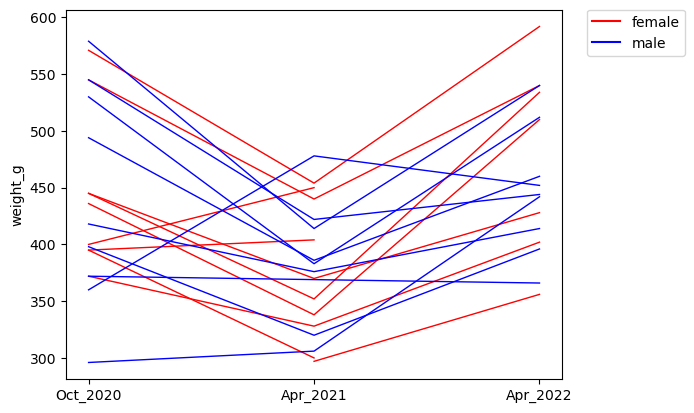

In [28]:
g = sns.lineplot(data=spag_weights, x='stupid_date', y='weight_g', hue='sex', palette=['red', 'blue'], 
            units="name", estimator=None, lw=1)
#plt.plot(x, y, label='weight_g')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
plt.xlabel('')
#g.set(xticklabels=['Arrival', 'Before Diet Change', 'After Diet Change']) #make these labels in inkscape
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/weights_3tp_spagplot_sex.svg', dpi=150, bbox_inches='tight') #use this image 

In [48]:
spag_weights_int = spag_weights[spag_weights['group']=='internal']
spag_weights_ext = spag_weights[spag_weights['group']=='external']
spag_weights_transfer = spag_weights[spag_weights['group']=='transfer']

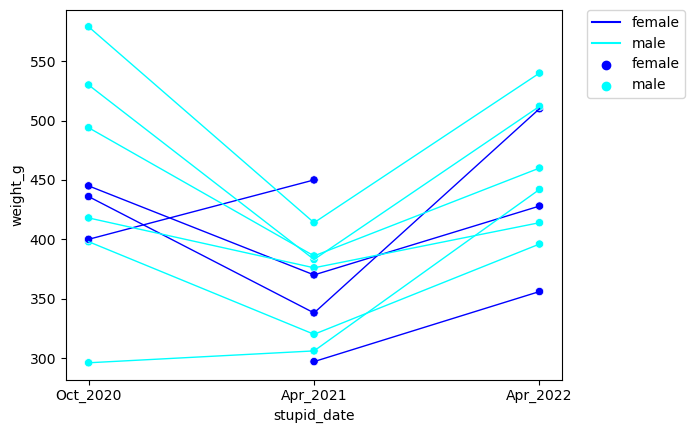

In [49]:
sns.lineplot(data=spag_weights_int, x='stupid_date', y='weight_g', hue='sex', 
             palette=['blue', 'cyan'], 
            units="name", estimator=None, lw=1, hue_order=['female', 'male'])
sns.scatterplot(data=spag_weights_int, x='stupid_date', y='weight_g', hue='sex', 
                palette=['blue', 'cyan'], 
            units="name", estimator=None, lw=1, hue_order=['female', 'male'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
#plt.xticks(['Arrival', 'Before Diet Change', 'After Diet Change']) #make these labels in inkscape
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/weights_internal_sex.svg', dpi=150, bbox_inches='tight') #use this image 

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Oct_2020 vs. Apr_2021: Mann-Whitney-Wilcoxon test two-sided, P_val:2.474e-02 U_stat=7.300e+01
Apr_2021 vs. Apr_2022: Mann-Whitney-Wilcoxon test two-sided, P_val:7.026e-03 U_stat=1.150e+01


(<AxesSubplot: xlabel='stupid_date', ylabel='weight_g'>,
  <statannotations.Annotation.Annotation at 0x7fa3dbaa5e80>])

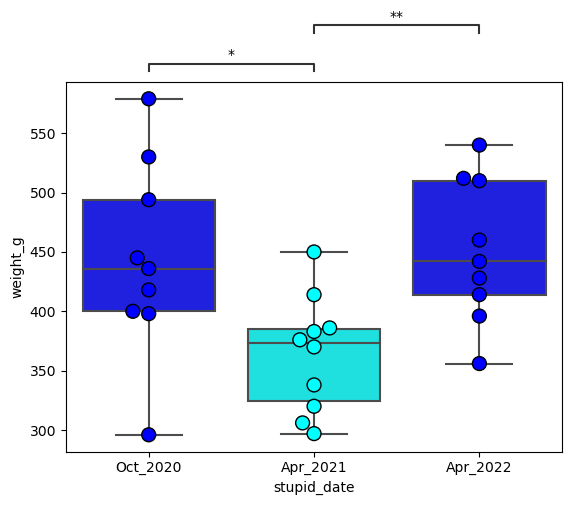

In [50]:
g = sns.boxplot(data=spag_weights_int, 
                x='stupid_date', y='weight_g', 
             palette=['blue', 'cyan'])
g = sns.swarmplot(data=spag_weights_int, 
                  x='stupid_date', y='weight_g', 
             palette=['blue', 'cyan'], dodge=True, s=10, edgecolor='k', linewidth=1,)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

annotator = Annotator(g, data=spag_weights_int, 
                    x='stupid_date', y='weight_g',
                    pairs=[('Oct_2020', 'Apr_2021'),('Apr_2021', 'Apr_2022')])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annotator.apply_and_annotate()

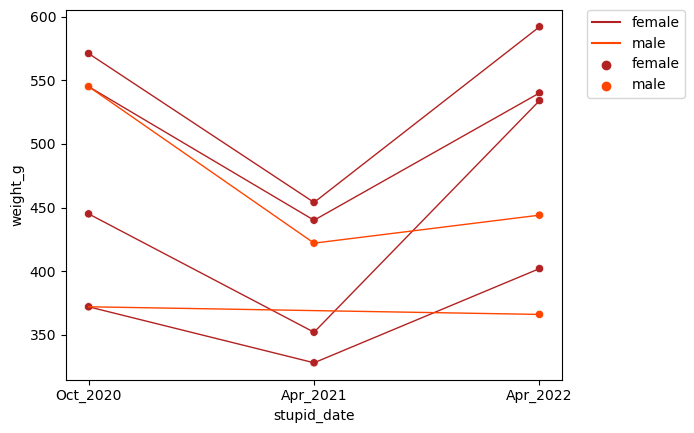

In [51]:
sns.lineplot(data=spag_weights_ext, x='stupid_date', y='weight_g', hue='sex', 
             palette=['firebrick', 'orangered'], 
            units="name", estimator=None, lw=1, hue_order=['female', 'male'])
sns.scatterplot(data=spag_weights_ext, x='stupid_date', y='weight_g', hue='sex', 
                palette=['firebrick', 'orangered'], 
            units="name", estimator=None, lw=1, hue_order=['female', 'male'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
#plt.xticks(['Arrival', 'Before Diet Change', 'After Diet Change'])
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/weights_external_sex.svg', dpi=150, bbox_inches='tight') #use this image 

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Oct_2020 vs. Apr_2021: Mann-Whitney-Wilcoxon test two-sided, P_val:1.690e-01 U_stat=2.300e+01
Apr_2021 vs. Apr_2022: Mann-Whitney-Wilcoxon test two-sided, P_val:1.775e-01 U_stat=7.000e+00


(<AxesSubplot: xlabel='stupid_date', ylabel='weight_g'>,
  <statannotations.Annotation.Annotation at 0x7fa3beacf7f0>])

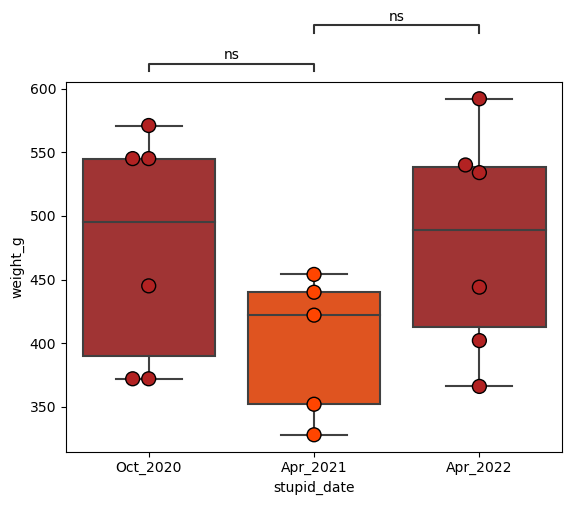

In [52]:
g = sns.boxplot(data=spag_weights_ext, 
                x='stupid_date', y='weight_g', 
             palette=['firebrick', 'orangered'])
g = sns.swarmplot(data=spag_weights_ext, 
                  x='stupid_date', y='weight_g', s=10, edgecolor='k', linewidth=1,
             palette=['firebrick', 'orangered'], dodge=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

annotator = Annotator(g, data=spag_weights_ext, 
                    x='stupid_date', y='weight_g',
                    pairs=[ ('Oct_2020', 'Apr_2021'),('Apr_2021', 'Apr_2022')])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annotator.apply_and_annotate()

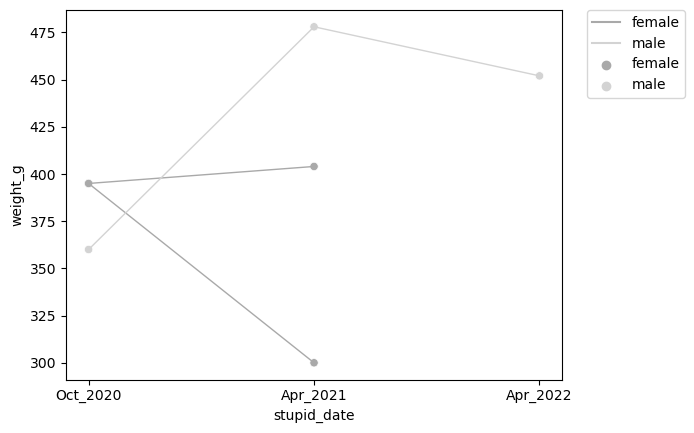

In [41]:
sns.lineplot(data=spag_weights_transfer, x='stupid_date', y='weight_g', hue='sex', 
             palette=['darkgrey', 'lightgrey'], hue_order=['female', 'male'],
            units="name", estimator=None, lw=1)
sns.scatterplot(data=spag_weights_transfer, x='stupid_date', y='weight_g', hue='sex', 
             palette=['darkgrey', 'lightgrey'], hue_order=['female', 'male'],
            units="name", estimator=None, lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
#plt.xticks(['Arrival', 'Before Diet Change', 'After Diet Change'])
plt.savefig('../figures/weightsJ1MGH_transfer_sex.svg', dpi=150, bbox_inches='tight') #use this image

In [42]:
weights.name.unique()

array(['Reba', 'Chrome', 'Asami', 'Beryl', 'Toph', 'Kenny', 'Ellen',
       'Mac', 'Johnny', 'Rene', 'Tammy', 'Bane', 'Martina', 'Abel',
       'Gadget', 'Kirk', 'Dolly', 'Loretta', 'Willie'], dtype=object)

In [43]:
weights[weights['name'] == 'Reba']

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,days_from_transition_start,stupid_date
0,Reba,Oct,2020,22-Oct,545,2020-10-21,NaN,female,2020-10-21,external,NaN,2021-06-17,0,-239,Oct_2020
1,Reba,Nov,2020,22-Nov,480,2020-11-20,NaN,female,2020-10-21,external,NaN,2021-06-17,30,-209,Nov_2020
2,Reba,Jan,2021,22-Jan,420,2021-01-12,NaN,female,2020-10-21,external,NaN,2021-06-17,83,-156,Jan_2021
3,Reba,Mar,2021,22-Mar,424,2021-03-09,NaN,female,2020-10-21,external,NaN,2021-06-17,139,-100,Mar_2021
4,Reba,Apr,2021,22-Apr,440,2021-04-06,NaN,female,2020-10-21,external,NaN,2021-06-17,167,-72,Apr_2021
5,Reba,May,2021,22-May,478,2021-05-03,NaN,female,2020-10-21,external,NaN,2021-06-17,194,-45,May_2021
6,Reba,Jun,2021,22-Jun,500,2021-06-02,NaN,female,2020-10-21,external,NaN,2021-06-17,224,-15,Jun_2021
7,Reba,Jul,2021,22-Jul,502,2021-07-08,NaN,female,2020-10-21,external,NaN,2021-06-17,260,21,Jul_2021
8,Reba,Sep,2021,22-Sep,492,2021-09-14,NaN,female,2020-10-21,external,NaN,2021-06-17,328,89,Sep_2021
9,Reba,Apr,2022,22-Apr,540,2022-04-05,NaN,female,2020-10-21,external,NaN,2021-06-17,531,292,Apr_2022


In [36]:
import datetime as dt

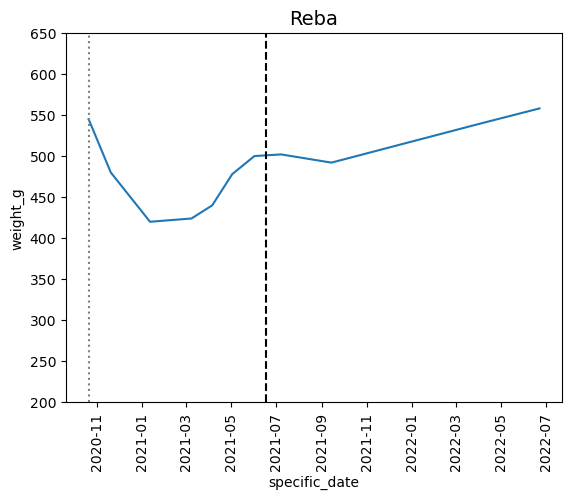

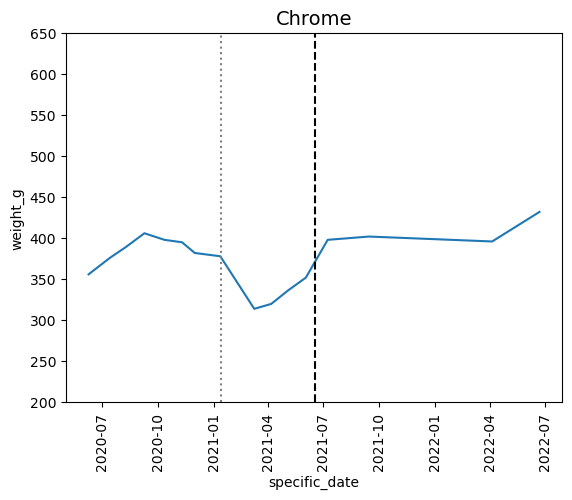

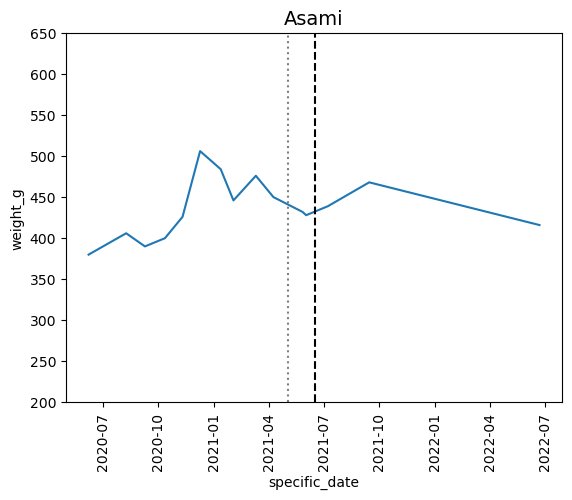

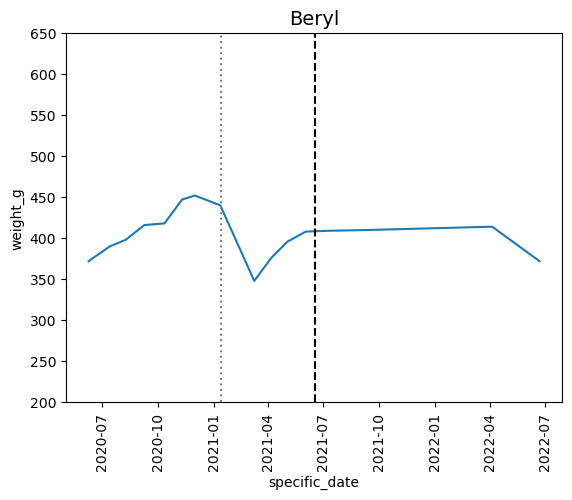

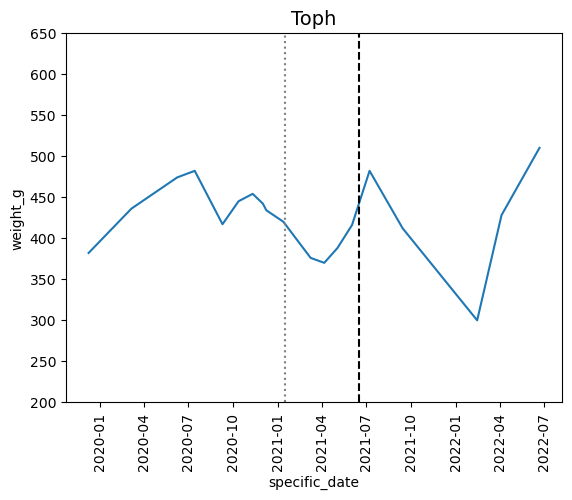

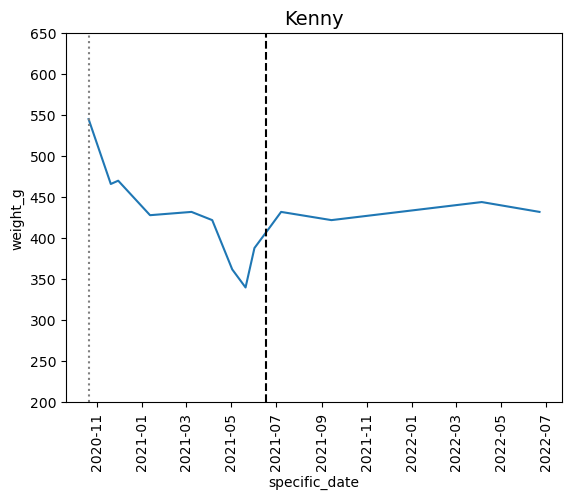

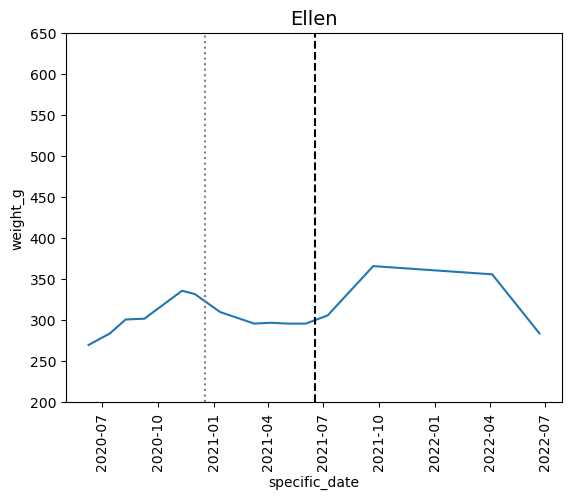

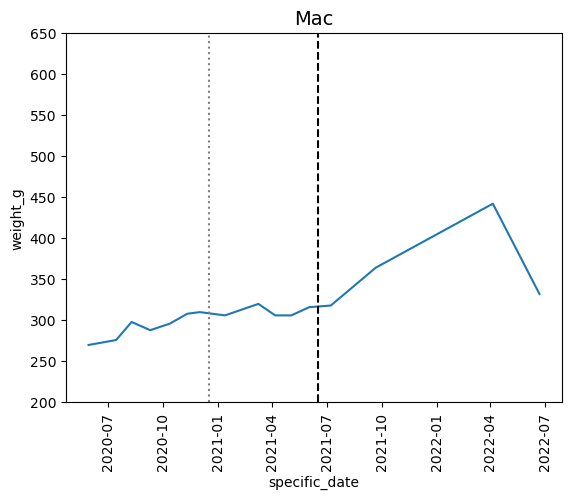

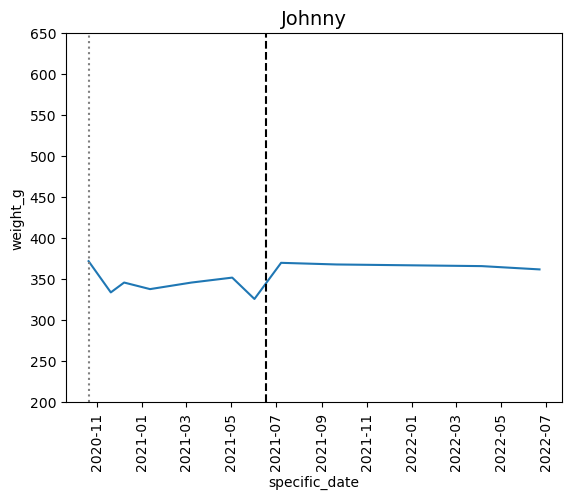

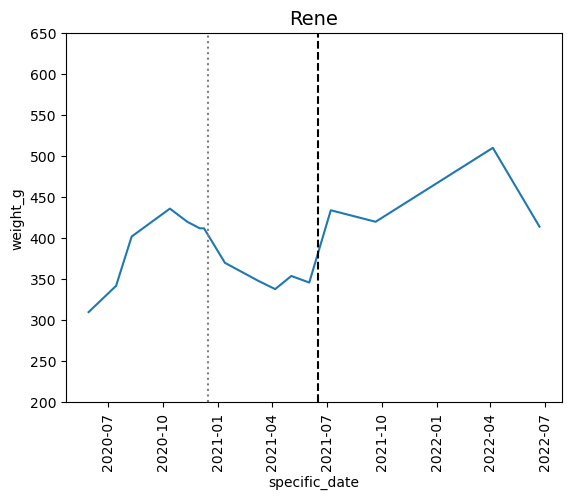

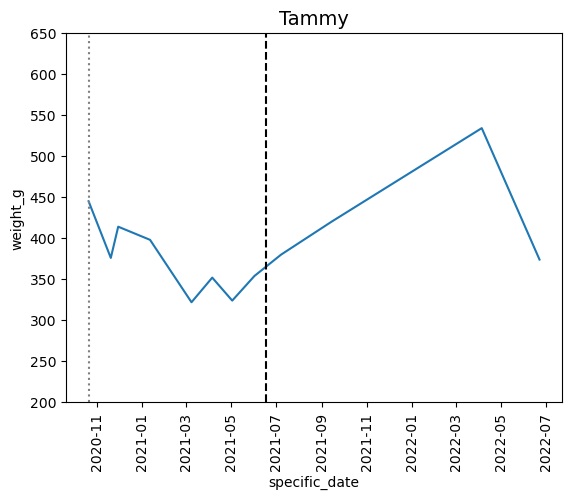

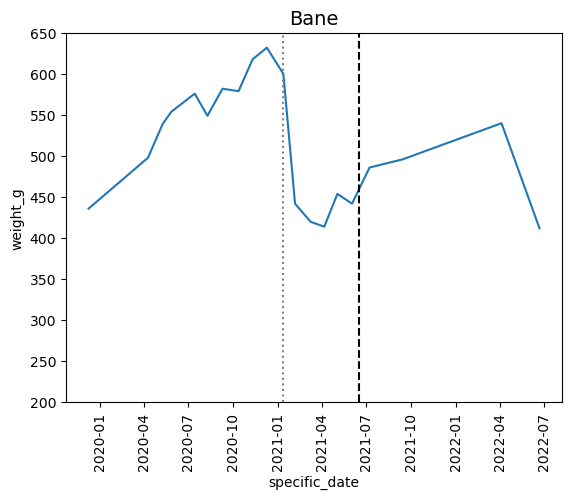

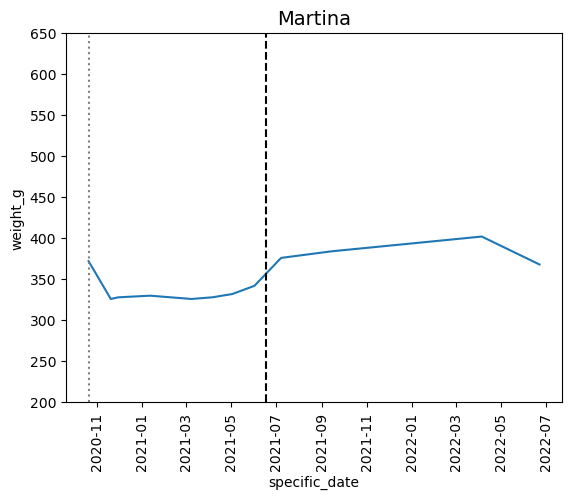

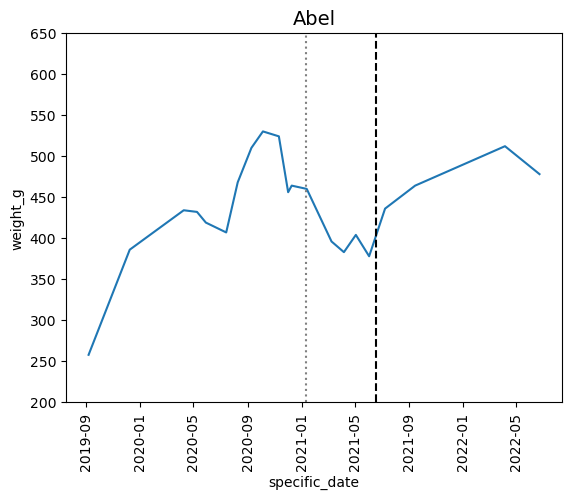

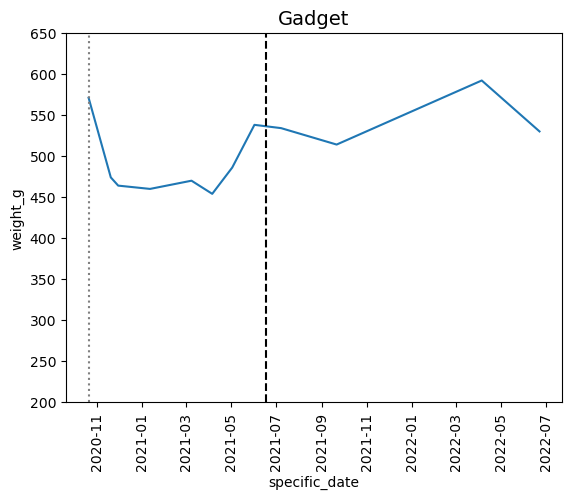

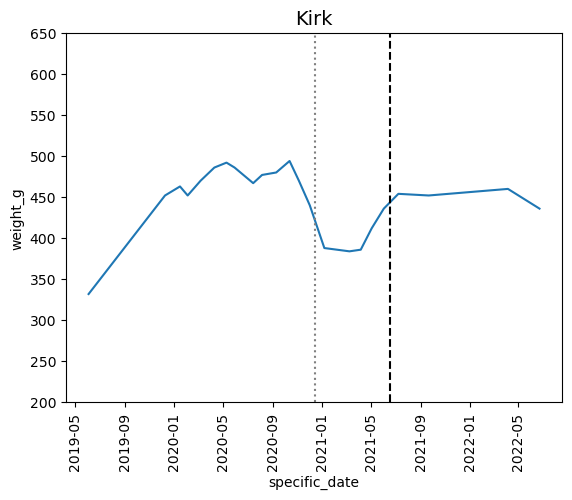

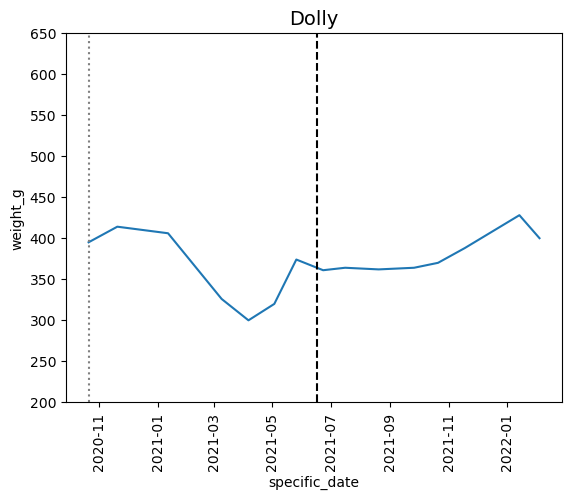

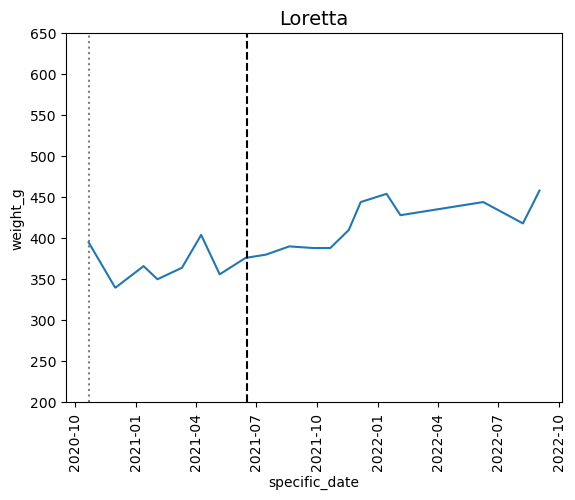

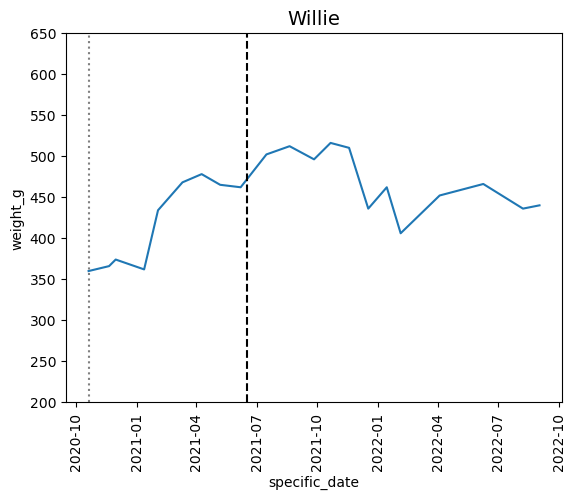

In [44]:
for nme in list(weights.name.unique()):
    sns.lineplot(data=weights[weights['name'] == nme], x='specific_date', y='weight_g')
    plt.xticks(rotation=90)
    plt.title('%s' % nme, fontsize=14)
    plt.ylim(200,650)
    plt.axvline(dt.datetime(2021, 6, 17), color='k', linestyle='--') #diet change
    plt.axvline(weights[weights['name'] == nme].J1_arrival_date.values[0], color='grey', linestyle=':')
    plt.savefig('../figures/individuals/individuals_%s.png' % nme, dpi=150, bbox_inches='tight')
    plt.show()

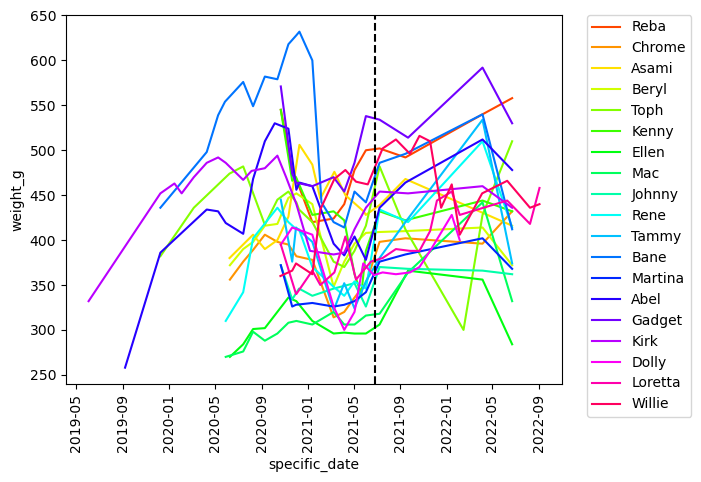

In [45]:
sns.lineplot(data=weights, x='specific_date', y='weight_g', hue='name', palette='hsv')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.rcParams.update({'text.usetex': False, "svg.fonttype": 'none'})
plt.savefig('../figures/weights_all.svg', dpi=150, bbox_inches='tight')

### exclude Reba

In [13]:
weightz = weights[weights['name'] != 'Reba']

In [14]:
weights2=weightz[weightz['month'] == 'Apr']
weights3 = weights2[weights2['year'] != 2020]
weights3


,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,stupid_date
20,Chrome,Apr,2021,22-Apr,320,2021-04-06,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,83,Apr_2021
25,Chrome,Apr,2022,22-Apr,396,2022-04-05,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,447,Apr_2022
36,Asami,Apr,2021,22-Apr,450,2021-04-09,7/25/19,female,2021-05-03,internal,NaN,2021-06-17,-24,Apr_2021
51,Beryl,Apr,2021,22-Apr,376,2021-04-06,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,83,Apr_2021
56,Beryl,Apr,2022,22-Apr,414,2022-04-05,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,447,Apr_2022
69,Toph,Apr,2021,22-Apr,370,2021-04-06,2/15/19,female,2021-01-15,internal,NaN,2021-06-17,81,Apr_2021
75,Toph,Apr,2022,22-Apr,428,2022-04-05,2/15/19,female,2021-01-15,internal,Yes,2021-06-17,445,Apr_2022
82,Kenny,Apr,2021,22-Apr,422,2021-04-06,NaN,male,2020-10-21,external,NaN,2021-06-17,167,Apr_2021
89,Kenny,Apr,2022,22-Apr,444,2022-04-05,NaN,male,2020-10-21,external,NaN,2021-06-17,531,Apr_2022
99,Ellen,Apr,2021,22-Apr,297,2021-04-06,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,110,Apr_2021


In [15]:
weights3.date.unique()

array(['22-Apr', '21-Apr'], dtype=object)

In [16]:
weights2=weights[weights['month'] == 'Jan']
weights3 = weights2[weights2['year'] != 2020]
weights3.head()

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,stupid_date
2,Reba,Jan,2021,22-Jan,420,2021-01-12,NaN,female,2020-10-21,external,NaN,2021-06-17,83,Jan_2021
18,Chrome,Jan,2021,22-Jan,378,2021-01-12,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,-1,Jan_2021
33,Asami,Jan,2021,22-Jan,484,2021-01-12,7/25/19,female,2021-05-03,internal,NaN,2021-06-17,-111,Jan_2021
49,Beryl,Jan,2021,22-Jan,440,2021-01-12,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,-1,Jan_2021
67,Toph,Jan,2021,22-Jan,420,2021-01-12,2/15/19,female,2021-01-15,internal,NaN,2021-06-17,-3,Jan_2021


In [17]:
weights2=weights[weights['month'] == 'Apr']
weights3 = weights2[weights2['year'] != 2020]
weights3.head()

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,stupid_date
4,Reba,Apr,2021,22-Apr,440,2021-04-06,NaN,female,2020-10-21,external,NaN,2021-06-17,167,Apr_2021
9,Reba,Apr,2022,22-Apr,540,2022-04-05,NaN,female,2020-10-21,external,NaN,2021-06-17,531,Apr_2022
20,Chrome,Apr,2021,22-Apr,320,2021-04-06,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,83,Apr_2021
25,Chrome,Apr,2022,22-Apr,396,2022-04-05,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,447,Apr_2022
36,Asami,Apr,2021,22-Apr,450,2021-04-09,7/25/19,female,2021-05-03,internal,NaN,2021-06-17,-24,Apr_2021


In [44]:
len(weights3[weights3['year'] == 2021].name.unique())

18

In [45]:
weights3[weights3['year'] == 2021].name.unique()

array(['Reba', 'Chrome', 'Asami', 'Beryl', 'Toph', 'Kenny', 'Ellen',
       'Mac', 'Rene', 'Tammy', 'Bane', 'Martina', 'Abel', 'Gadget',
       'Kirk', 'Dolly', 'Loretta', 'Willie'], dtype=object)

In [46]:
len(weights3[weights3['year'] == 2022].name.unique())

16

In [47]:
weights3[weights3['year'] == 2022].name.unique()

array(['Reba', 'Chrome', 'Beryl', 'Toph', 'Kenny', 'Ellen', 'Mac',
       'Johnny', 'Rene', 'Tammy', 'Bane', 'Martina', 'Abel', 'Gadget',
       'Kirk', 'Willie'], dtype=object)

In [48]:
weights4 = weights3[~weights3.name.isin(['Loretta', "Willie", 'Dolly', 
                                         'Johnny', 'Beryl', 'Asami'])]

In [49]:
len(weights4[weights4['year'] == 2022].name.unique())

13

In [50]:
weights4[weights4['year'] == 2022].name.unique()

array(['Reba', 'Chrome', 'Toph', 'Kenny', 'Ellen', 'Mac', 'Rene', 'Tammy',
       'Bane', 'Martina', 'Abel', 'Gadget', 'Kirk'], dtype=object)

In [51]:
len(weights4[weights4['year'] == 2021].name.unique())

13

In [52]:
weights4[weights4['year'] == 2021].name.unique()

array(['Reba', 'Chrome', 'Toph', 'Kenny', 'Ellen', 'Mac', 'Rene', 'Tammy',
       'Bane', 'Martina', 'Abel', 'Gadget', 'Kirk'], dtype=object)

In [53]:
weights3[~weights3.name.isin(['Loretta', "Willie", 'Dolly', 
                                         'Johnny', 'Beryl', 'Asami'])]

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,days_from_transition_start,stupid_date
4,Reba,Apr,2021,22-Apr,440,2021-04-06,NaN,female,2020-10-21,external,NaN,2021-06-17,167,-72,Apr_2021
9,Reba,Apr,2022,22-Apr,540,2022-04-05,NaN,female,2020-10-21,external,NaN,2021-06-17,531,292,Apr_2022
20,Chrome,Apr,2021,22-Apr,320,2021-04-06,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,83,-72,Apr_2021
25,Chrome,Apr,2022,22-Apr,396,2022-04-05,5/3/19,male,2021-01-13,internal,NaN,2021-06-17,447,292,Apr_2022
69,Toph,Apr,2021,22-Apr,370,2021-04-06,2/15/19,female,2021-01-15,internal,NaN,2021-06-17,81,-72,Apr_2021
75,Toph,Apr,2022,22-Apr,428,2022-04-05,2/15/19,female,2021-01-15,internal,Yes,2021-06-17,445,292,Apr_2022
82,Kenny,Apr,2021,22-Apr,422,2021-04-06,NaN,male,2020-10-21,external,NaN,2021-06-17,167,-72,Apr_2021
89,Kenny,Apr,2022,22-Apr,444,2022-04-05,NaN,male,2020-10-21,external,NaN,2021-06-17,531,292,Apr_2022
99,Ellen,Apr,2021,22-Apr,297,2021-04-06,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,110,-72,Apr_2021
104,Ellen,Apr,2022,22-Apr,356,2022-04-05,6/10/19,female,2020-12-17,internal,Yes,2021-06-17,474,292,Apr_2022


In [54]:
weights33 = weights3[~weights3.name.isin(['Loretta', "Willie", 'Dolly', 
                                         'Johnny', 'Beryl', 'Asami'])]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
Apr_2021 v.s. Apr_2022: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.441e-04 stat=0.000e+00


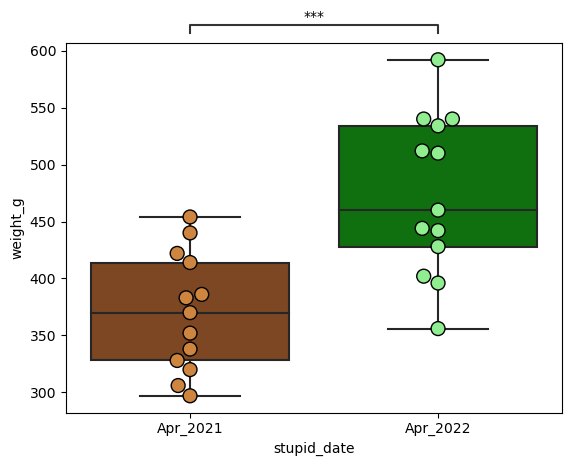

In [55]:
g = sns.boxplot(data=weights33, 
                x='stupid_date', y='weight_g', palette=['saddlebrown','green']) 
g = sns.swarmplot(data=weights33, 
                    x='stupid_date', y='weight_g', 
                    palette=['peru','lightgreen'], linewidth=1, edgecolor='k', s=10)

add_stat_annotation(g, data=weights33, 
                    x='stupid_date', y='weight_g',
                                   box_pairs=[('Apr_2021', 'Apr_2022')],
                                   test='Wilcoxon', text_format='star', loc='outside', verbose=2)

plt.savefig('../figures/pre_post_compare.svg', dpi=150, bbox_inches='tight') #correct image****

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
Apr_2021_female v.s. Apr_2022_female: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.125e-02 stat=0.000e+00
Using zero_method  pratt
Apr_2021_male v.s. Apr_2022_male: Wilcoxon test (paired samples) with Bonferroni correction, P_val=6.250e-02 stat=0.000e+00


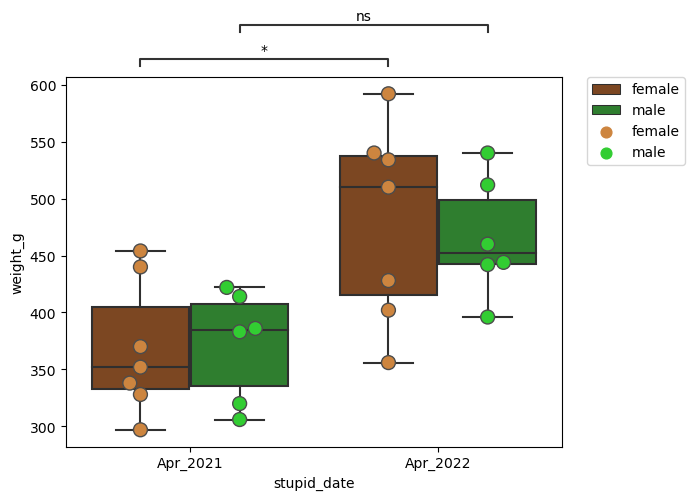

In [56]:
g = sns.boxplot(data=weights33, x='stupid_date', y='weight_g', hue='sex', 
                palette=['saddlebrown', 'forestgreen']) 
g = sns.swarmplot(data=weights33, x='stupid_date', y='weight_g', hue='sex', dodge=True, 
                    palette=['peru', 'limegreen'], s=10, linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

add_stat_annotation(g, data=weights33, x='stupid_date', y='weight_g', hue='sex',
                                   box_pairs=[ (('Apr_2021', 'female'),('Apr_2022', 'female')), 
                                             (('Apr_2021', 'male'),('Apr_2022', 'male'))],
                                   test='Wilcoxon', text_format='star', loc='outside', verbose=2)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/pre_post_compare_sex.svg', dpi=150, bbox_inches='tight')#sig male, not with the females. 

In [57]:
weights[weights['name'] == 'Ellen']

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,days_from_transition_start,stupid_date
91,Ellen,Jun,2020,22-Jun,270,2020-06-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-191,-373,Jun_2020
92,Ellen,Jul,2020,22-Jul,284,2020-07-14,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-156,-338,Jul_2020
93,Ellen,Aug,2020,22-Aug,301,2020-08-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-130,-312,Aug_2020
94,Ellen,Sep,2020,22-Sep,302,2020-09-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-99,-281,Sep_2020
95,Ellen,Nov,2020,22-Nov,336,2020-11-10,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-37,-219,Nov_2020
96,Ellen,Dec,2020,22-Dec,332,2020-12-01,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-16,-198,Dec_2020
97,Ellen,Jan,2021,22-Jan,310,2021-01-12,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,26,-156,Jan_2021
98,Ellen,Mar,2021,22-Mar,296,2021-03-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,82,-100,Mar_2021
99,Ellen,Apr,2021,22-Apr,297,2021-04-06,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,110,-72,Apr_2021
100,Ellen,May,2021,22-May,296,2021-05-03,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,137,-45,May_2021


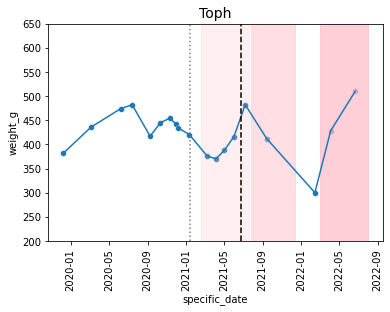

In [214]:
g = sns.lineplot(data=weights[weights['name'] == 'Toph'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Toph'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Toph', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Toph'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 2, 19), dt.datetime(2021, 7, 21), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window
g.axvspan(dt.datetime(2021, 7, 25), dt.datetime(2021, 12, 14), 
            color='pink', alpha=0.5, label='pregnancy') #pregnancy2 window
g.axvspan(dt.datetime(2022, 3, 2), dt.datetime(2022, 8, 1), 
            color='pink', alpha=0.75, label='pregnancy') #pregnancy3 window
plt.savefig('../figures/individuals/individuals_Toph2.png', dpi=150, bbox_inches='tight')
plt.show()

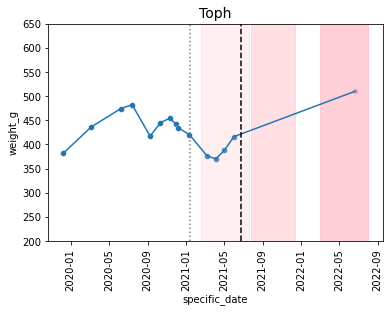

In [215]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Toph'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Toph'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Toph', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Toph'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 2, 19), dt.datetime(2021, 7, 21), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window
g.axvspan(dt.datetime(2021, 7, 25), dt.datetime(2021, 12, 14), 
            color='pink', alpha=0.5, label='pregnancy') #pregnancy2 window
g.axvspan(dt.datetime(2022, 3, 2), dt.datetime(2022, 8, 1), 
            color='pink', alpha=0.75, label='pregnancy') #pregnancy3 window
plt.savefig('../figures/individuals/individuals_Toph3.png', dpi=150, bbox_inches='tight')
plt.show()

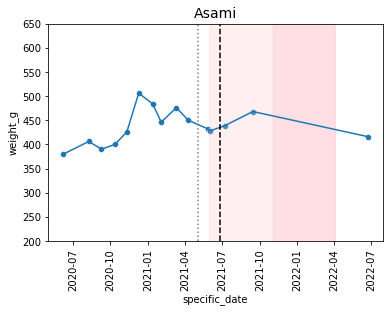

In [216]:
g = sns.lineplot(data=weights[weights['name'] == 'Asami'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Asami'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Asami', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Asami'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 5, 31), dt.datetime(2021, 10, 30), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window
g.axvspan(dt.datetime(2021, 11, 3), dt.datetime(2022, 4, 4), 
            color='pink', alpha=0.5, label='pregnancy') #pregnancy2 window

plt.savefig('../figures/individuals/individuals_Asami2.png', dpi=150, bbox_inches='tight')
plt.show()

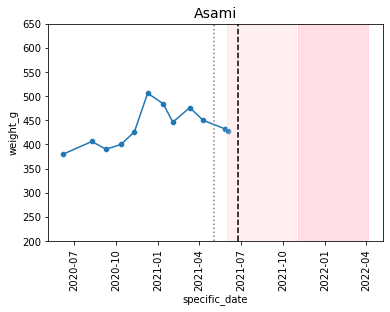

In [217]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Asami'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Asami'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Asami', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Asami'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 5, 31), dt.datetime(2021, 10, 30), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window
g.axvspan(dt.datetime(2021, 11, 3), dt.datetime(2022, 4, 4), 
            color='pink', alpha=0.5, label='pregnancy') #pregnancy2 window

plt.savefig('../figures/individuals/individuals_Asami3.png', dpi=150, bbox_inches='tight')
plt.show()

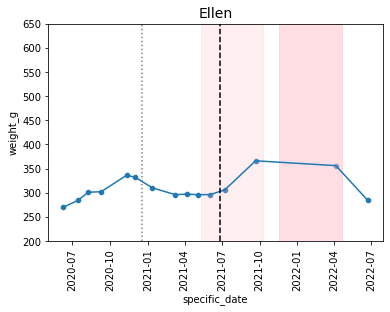

In [218]:
g = sns.lineplot(data=weights[weights['name'] == 'Ellen'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Ellen'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Ellen', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Ellen'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 5, 11), dt.datetime(2021, 10, 10), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window
g.axvspan(dt.datetime(2021, 11, 18), dt.datetime(2022, 4, 19), 
            color='pink', alpha=0.5, label='pregnancy') #pregnancy2 window

plt.savefig('../figures/individuals/individuals_Ellen2.png', dpi=150, bbox_inches='tight')
plt.show()

In [219]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
weights_nopreg.pregnancy.unique()

array([nan], dtype=object)

In [220]:
print(weights.shape)
print(weights_nopreg.shape)

(306, 15)
(274, 15)


In [221]:
weights_nopreg[weights_nopreg['name'] == 'Ellen']

,name,month,year,date,weight_g,specific_date,marmo_birthday,sex,J1_arrival_date,group,pregnancy,start_transition_date,days_from_arrival,days_from_transition_start,stupid_date
91,Ellen,Jun,2020,22-Jun,270,2020-06-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-191,-373,Jun_2020
92,Ellen,Jul,2020,22-Jul,284,2020-07-14,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-156,-338,Jul_2020
93,Ellen,Aug,2020,22-Aug,301,2020-08-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-130,-312,Aug_2020
94,Ellen,Sep,2020,22-Sep,302,2020-09-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-99,-281,Sep_2020
95,Ellen,Nov,2020,22-Nov,336,2020-11-10,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-37,-219,Nov_2020
96,Ellen,Dec,2020,22-Dec,332,2020-12-01,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,-16,-198,Dec_2020
97,Ellen,Jan,2021,22-Jan,310,2021-01-12,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,26,-156,Jan_2021
98,Ellen,Mar,2021,22-Mar,296,2021-03-09,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,82,-100,Mar_2021
99,Ellen,Apr,2021,22-Apr,297,2021-04-06,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,110,-72,Apr_2021
100,Ellen,May,2021,22-May,296,2021-05-03,6/10/19,female,2020-12-17,internal,NaN,2021-06-17,137,-45,May_2021


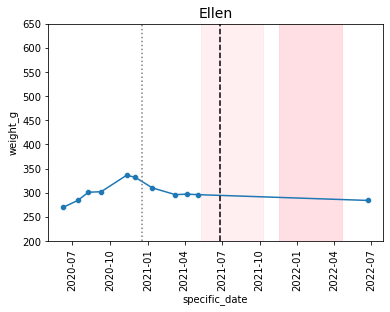

In [222]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Ellen'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Ellen'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Ellen', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Ellen'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 5, 11), dt.datetime(2021, 10, 10), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window
g.axvspan(dt.datetime(2021, 11, 18), dt.datetime(2022, 4, 19), 
            color='pink', alpha=0.5, label='pregnancy') #pregnancy2 window

plt.savefig('../figures/individuals/individuals_Ellen3.png', dpi=150, bbox_inches='tight')
plt.show()

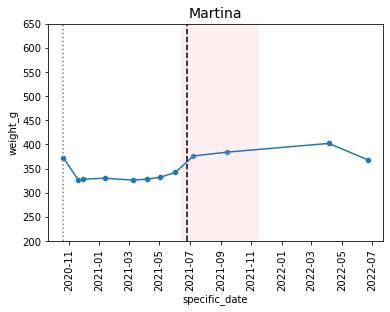

In [223]:
g = sns.lineplot(data=weights[weights['name'] == 'Martina'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Martina'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Martina', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Martina'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 6, 14), dt.datetime(2021, 11, 13), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Martina2.png', dpi=150, bbox_inches='tight')
plt.show()

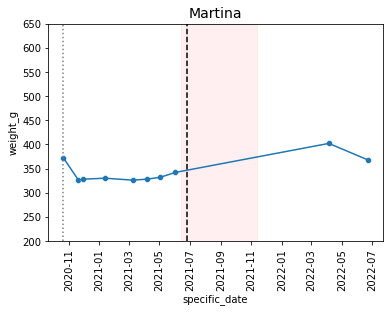

In [224]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Martina'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Martina'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Martina', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Martina'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 6, 14), dt.datetime(2021, 11, 13), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Martina3.png', dpi=150, bbox_inches='tight')
plt.show()

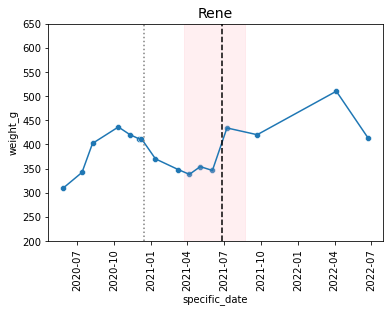

In [225]:
g = sns.lineplot(data=weights[weights['name'] == 'Rene'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Rene'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Rene', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Rene'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 3, 23), dt.datetime(2021, 8, 22), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Rene2.png', dpi=150, bbox_inches='tight')
plt.show()

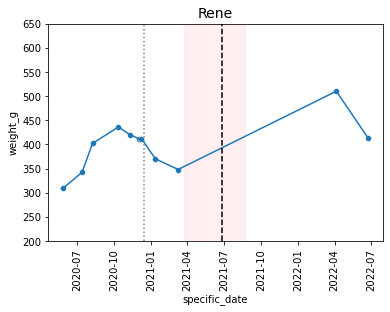

In [226]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Rene'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Rene'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Rene', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Rene'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 3, 23), dt.datetime(2021, 8, 22), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Rene3.png', dpi=150, bbox_inches='tight')
plt.show()

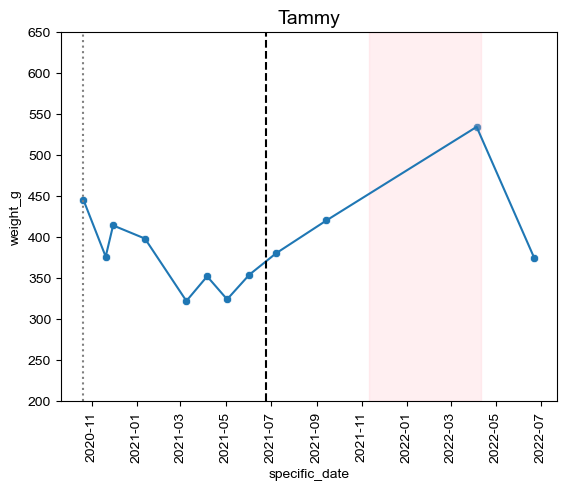

In [22]:
g = sns.lineplot(data=weights[weights['name'] == 'Tammy'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Tammy'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Tammy', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Tammy'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 11, 10), dt.datetime(2022, 4, 11), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/individuals/individuals_Tammy2.svg', dpi=150, bbox_inches='tight')
plt.show()

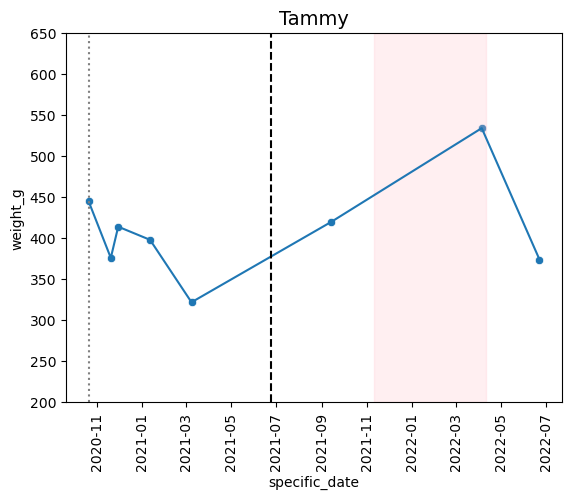

In [20]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Tammy'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Tammy'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Tammy', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Tammy'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 11, 10), dt.datetime(2022, 4, 11), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Tammy3.png', dpi=150, bbox_inches='tight')
plt.show()

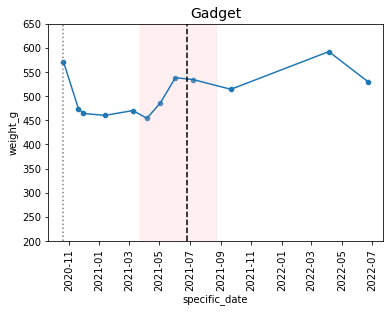

In [229]:
g = sns.lineplot(data=weights[weights['name'] == 'Gadget'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Gadget'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Gadget', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Gadget'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 3, 23), dt.datetime(2021, 8, 22), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Gadget2.png', dpi=150, bbox_inches='tight')
plt.show()

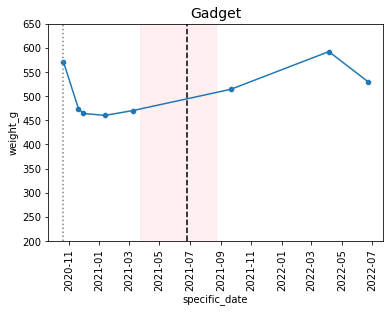

In [230]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Gadget'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Gadget'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Gadget', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Gadget'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 3, 23), dt.datetime(2021, 8, 22), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Gadget3.png', dpi=150, bbox_inches='tight')
plt.show()

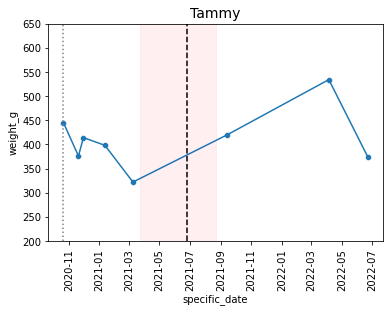

In [231]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Tammy'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Tammy'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Tammy', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Tammy'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 3, 23), dt.datetime(2021, 8, 22), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Tammy3.png', dpi=150, bbox_inches='tight')
plt.show()

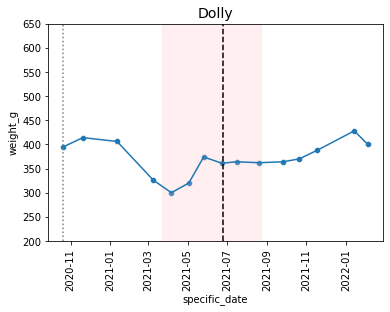

In [232]:
g = sns.lineplot(data=weights[weights['name'] == 'Dolly'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Dolly'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Dolly', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Dolly'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 3, 23), dt.datetime(2021, 8, 22), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Dolly2.png', dpi=150, bbox_inches='tight')
plt.show()

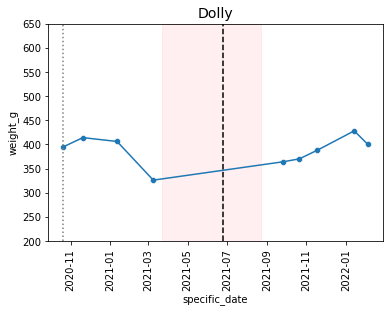

In [233]:
weights_nopreg = weights[weights.pregnancy != 'Yes']
g = sns.lineplot(data=weights_nopreg[weights_nopreg['name'] == 'Dolly'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights_nopreg[weights_nopreg['name'] == 'Dolly'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Dolly', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights_nopreg[weights_nopreg['name'] == 'Dolly'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2021, 3, 23), dt.datetime(2021, 8, 22), 
            color='pink', alpha=0.25, label='pregnancy') #pregnancy1 window

plt.savefig('../figures/individuals/individuals_Dolly3.png', dpi=150, bbox_inches='tight')
plt.show()

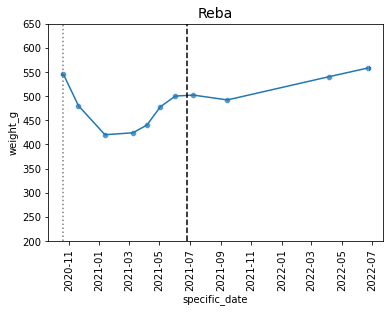

In [234]:
g = sns.lineplot(data=weights[weights['name'] == 'Reba'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Reba'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Reba', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Reba'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1

g.axvspan(dt.datetime(2020, 10, 21), dt.datetime(2022, 6, 22), 
          color='white', alpha=0.25, label='pregnancy') #NO pregnancy

plt.savefig('../figures/individuals/individuals_Rene2.png', dpi=150, bbox_inches='tight')
plt.show()

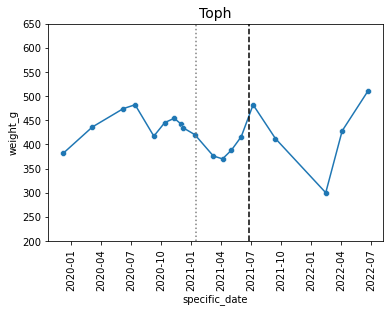

In [235]:
g = sns.lineplot(data=weights[weights['name'] == 'Toph'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Toph'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Toph', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Toph'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Toph4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

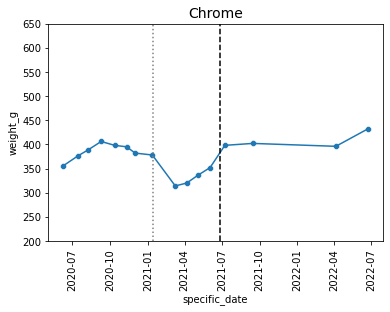

In [236]:
g = sns.lineplot(data=weights[weights['name'] == 'Chrome'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Chrome'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Chrome', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Chrome'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Chrome4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

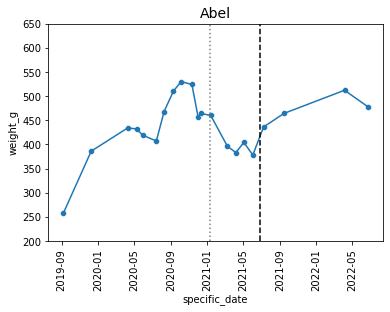

In [237]:
g = sns.lineplot(data=weights[weights['name'] == 'Abel'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Abel'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Abel', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Abel'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Abel4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

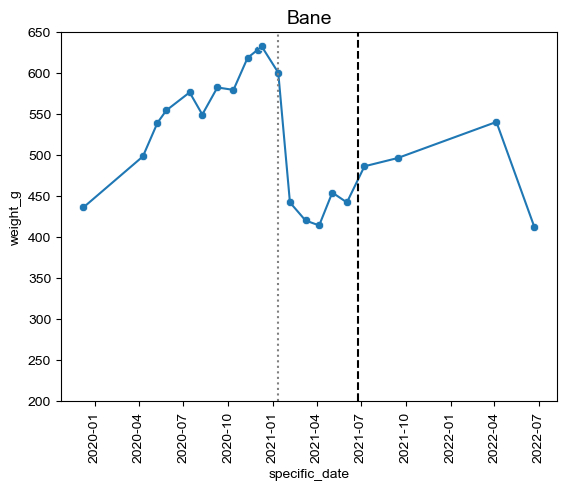

In [23]:
g = sns.lineplot(data=weights[weights['name'] == 'Bane'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Bane'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Bane', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Bane'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/individuals/individuals_Bane4mghtoJ1.svg', dpi=150, bbox_inches='tight')
plt.show()

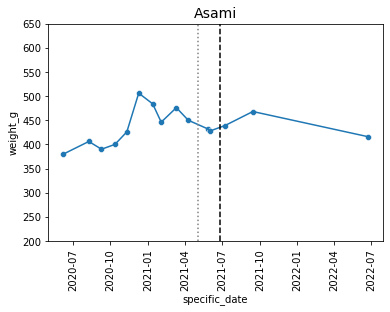

In [239]:
g = sns.lineplot(data=weights[weights['name'] == 'Asami'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Asami'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Asami', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Asami'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Asami4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

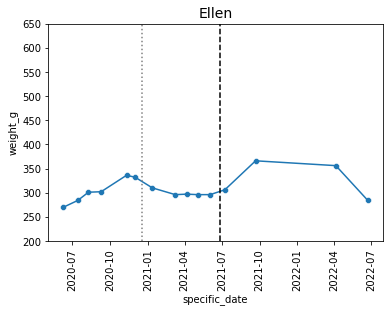

In [240]:
g = sns.lineplot(data=weights[weights['name'] == 'Ellen'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Ellen'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Ellen', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Ellen'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Ellen4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

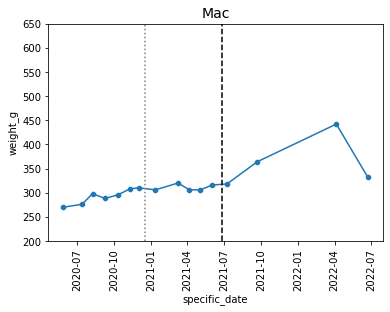

In [241]:
g = sns.lineplot(data=weights[weights['name'] == 'Mac'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Mac'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Mac', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Mac'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Mac4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

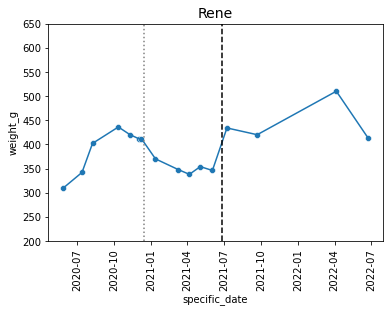

In [242]:
g = sns.lineplot(data=weights[weights['name'] == 'Rene'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Rene'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Rene', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Rene'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Rene4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

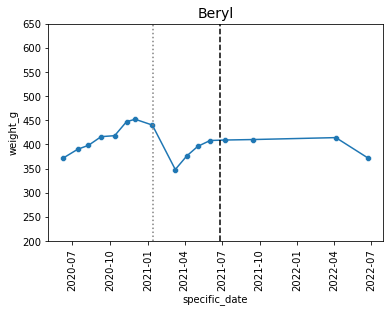

In [243]:
g = sns.lineplot(data=weights[weights['name'] == 'Beryl'], x='specific_date', y='weight_g')
g = sns.scatterplot(data=weights[weights['name'] == 'Beryl'], x='specific_date', y='weight_g')
plt.xticks(rotation=90)
plt.title('Beryl', fontsize=14)
plt.ylim(200,650)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.axvline(weights[weights['name'] == 'Beryl'].J1_arrival_date.values[0], color='grey', linestyle=':') #arrived J1 from MGh

plt.savefig('../figures/individuals/individuals_Beryl4mghtoJ1.png', dpi=150, bbox_inches='tight')
plt.show()

# Reproductive Data
#### changes in fertility

In [6]:
repro = pd.read_csv('../data/Physiological/repro_info_python.csv')
repro

,dam_name,offspring_produced,birth_date,approx_mating,mating_change,date_changed,days_from_change,gestation_change_75,gestation_change_50,total_born,survived,percent_survival,died,offspring_notes,dam_notes
0,Reba,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,arrived 10/21/2020; partner is Chrome
1,Asami,Y,10/30/21,5/31/21,pre,6/25/21,-127.0,post,post,2,1.0,50.0,1.0,NaN,transferred to J1 from MGH 5/3/2021; partner i...
2,Asami,Y,4/4/22,11/3/21,post,6/25/21,-283.0,post,post,2,2.0,100.0,0.0,NaN,NaN
3,Toph,Y,7/21/21,2/19/21,pre,6/25/21,-26.0,pre,pre,3,2.0,67.0,1.0,NaN,transferred to J1 from MGH 1/15/2021; partner ...
4,Toph,Y,12/24/21,7/25/21,post,6/25/21,-182.0,post,post,2,1.0,50.0,1.0,1 alive,"weight loss, lethargy, diah event 2/14/2022- 2..."
5,Toph,Y,8/1/22,3/2/22,post,6/25/21,-402.0,post,post,3,2.0,67.0,1.0,1 euthanized - fell,NaN
6,Ellen,Y,10/10/21,5/11/21,pre,6/25/21,-107.0,pre,post,3,0.0,0.0,3.0,NaN,transferred to J1 from MGH 12/7/2020; partner ...
7,Ellen,Y,4/19/22,11/18/21,post,6/25/21,-298.0,post,post,2,2.0,100.0,0.0,"rejected by mother, hand reared",NaN
8,Rene,Y,8/22/21,3/23/21,pre,6/25/21,-58.0,pre,pre,3,0.0,0.0,3.0,NaN,transferred to J1 from MGH 12/15/2020; partner...
9,Tammy,Y,4/11/22,11/10/21,post,6/25/21,-290.0,post,post,3,2.0,67.0,1.0,NaN,arrived 10/21/2020; partner is Bane


In [7]:
repro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dam_name             16 non-null     object 
 1   offspring_produced   16 non-null     object 
 2   birth_date           15 non-null     object 
 3   approx_mating        15 non-null     object 
 4   mating_change        15 non-null     object 
 5   date_changed         15 non-null     object 
 6   days_from_change     15 non-null     float64
 7   gestation_change_75  15 non-null     object 
 8   gestation_change_50  15 non-null     object 
 9   total_born           16 non-null     int64  
 10  survived             15 non-null     float64
 11  percent_survival     15 non-null     float64
 12  died                 15 non-null     float64
 13  offspring_notes      3 non-null      object 
 14  dam_notes            11 non-null     object 
dtypes: float64(4), int64(1), object(10)
memory

In [8]:
repro['birth_date'] = pd.to_datetime(repro['birth_date'])

In [ ]:
import pandas as pd
  
# load csv file
df = pd.read_csv("repro_info_python.csv")
df['offspring_produced'] = df['offspring_produced'].map(
                   {'yes':1 ,'no':0})
df

In [ ]:
import matplotlib.pyplot as plt
 
 
x =['dam_name']
 
y =['total_born']
 
plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.show()

<AxesSubplot: xlabel='dam_name', ylabel='total_born'>

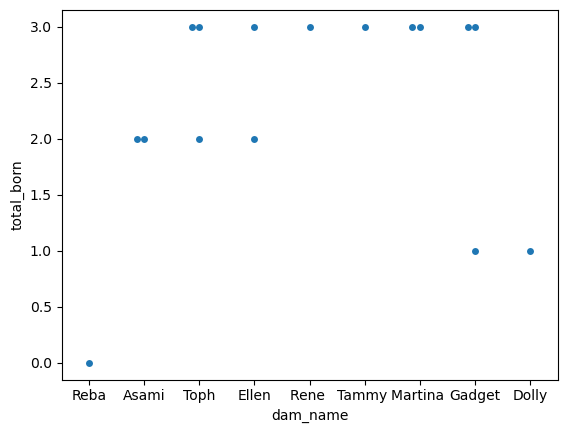

In [11]:
sns.swarmplot(data=repro, x='dam_name', y='total_born')

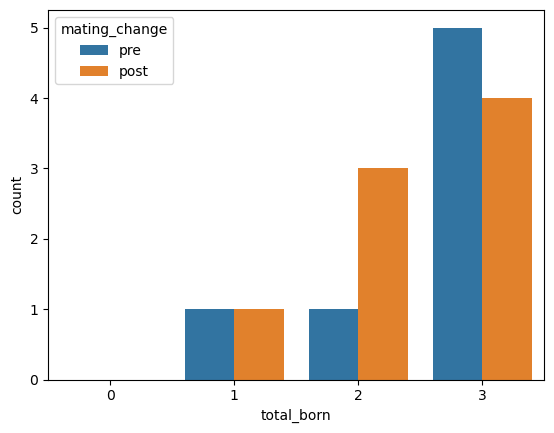

In [13]:
sns.countplot(data=repro, x='total_born', hue='mating_change')
plt.savefig('../figures/repro_totalborn_prepost.svg', dpi=150, bbox_inches='tight')

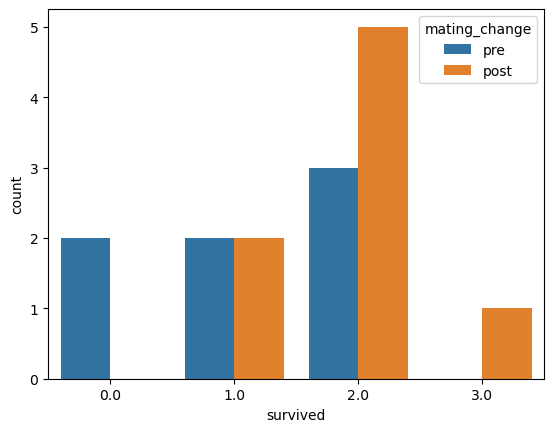

In [14]:
sns.countplot(data=repro, x='survived', hue='mating_change')
plt.savefig('../figures/repro_totalsurvived_prepost.svg', dpi=150, bbox_inches='tight')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Reba'),
  Text(1, 0, 'Asami'),
  Text(2, 0, 'Toph'),
  Text(3, 0, 'Ellen'),
  Text(4, 0, 'Rene '),
  Text(5, 0, 'Tammy '),
  Text(6, 0, 'Martina '),
  Text(7, 0, 'Gadget'),
  Text(8, 0, 'Dolly')])

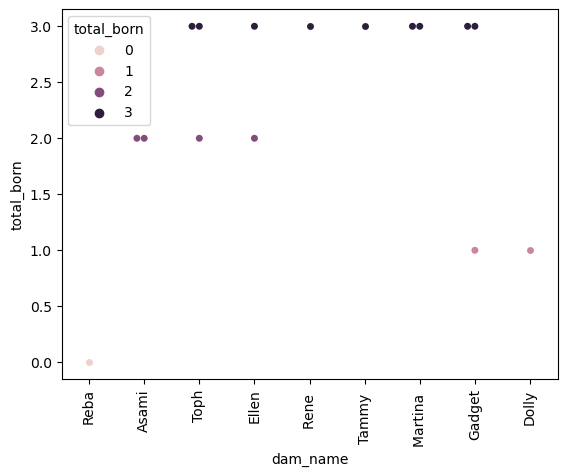

In [15]:
sns.swarmplot(data=repro, x='dam_name', y='total_born', hue='total_born')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Reba'),
  Text(1, 0, 'Asami'),
  Text(2, 0, 'Toph'),
  Text(3, 0, 'Ellen'),
  Text(4, 0, 'Rene '),
  Text(5, 0, 'Tammy '),
  Text(6, 0, 'Martina '),
  Text(7, 0, 'Gadget'),
  Text(8, 0, 'Dolly')])

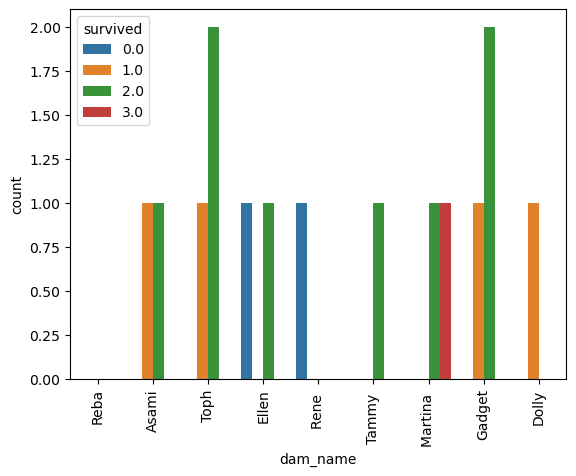

In [16]:
sns.countplot(data=repro, x='dam_name', hue='survived')
plt.xticks(rotation=90)

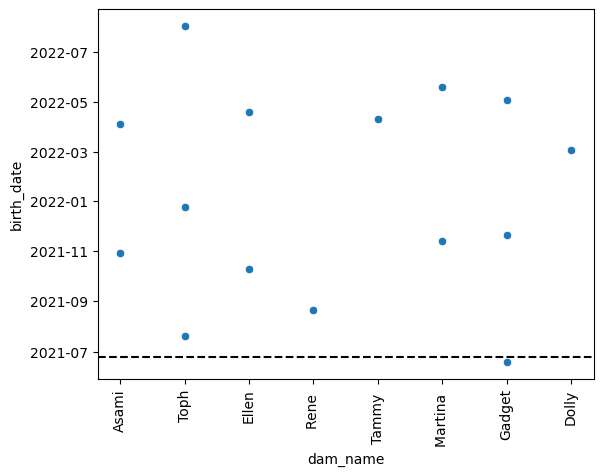

In [19]:
sns.scatterplot(data=repro, x='dam_name', y='birth_date')
plt.xticks(rotation=90)
plt.axhline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.savefig('../figures/repro_all.png', dpi=150, bbox_inches='tight')

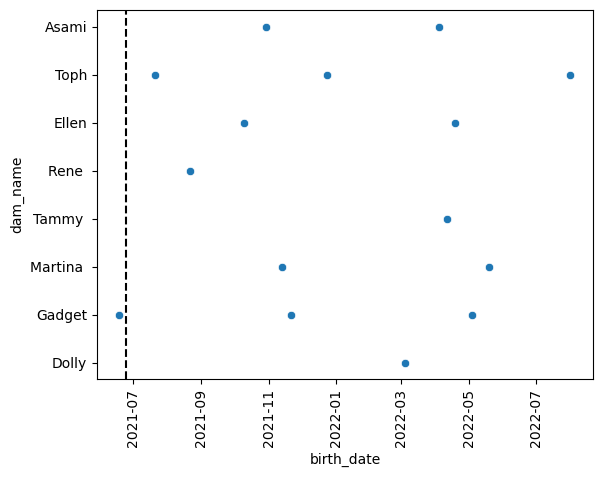

In [20]:
sns.scatterplot(data=repro, y='dam_name', x='birth_date')
plt.xticks(rotation=90)
plt.axvline(dt.datetime(2021, 6, 25), color='k', linestyle='--') #diet change
plt.savefig('../figures/repro_all2.png', dpi=150, bbox_inches='tight')

In [21]:
repro.dam_name.unique()

array(['Reba', 'Asami', 'Toph', 'Ellen', 'Rene ', 'Tammy ', 'Martina ',
       'Gadget', 'Dolly'], dtype=object)

In [22]:
repro[repro['dam_name'] == 'Reba']

,dam_name,offspring_produced,birth_date,approx_mating,mating_change,date_changed,days_from_change,gestation_change_75,gestation_change_50,total_born,survived,percent_survival,died,offspring_notes,dam_notes
0,Reba,N,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,arrived 10/21/2020; partner is Chrome


In [23]:
repro2 = repro.groupby(by='gestation_change_75').sum() 
repro2 = repro2.reset_index() #0 1 - to use pre and post to plot
repro2

/var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/ipykernel_26656/22678828.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  repro2 = repro.groupby(by='gestation_change_75').sum()


,gestation_change_75,days_from_change,total_born,survived,percent_survival,died
0,post,-2765.0,27,20.0,835.0,7.0
1,pre,-185.0,10,3.0,167.0,7.0


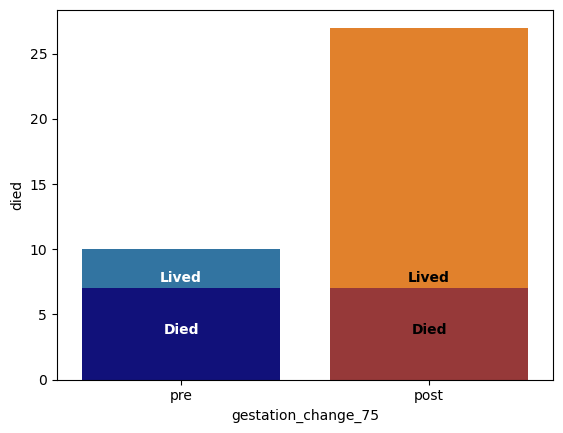

In [25]:
sns.barplot(data=repro2, x='gestation_change_75', y='total_born', order=['pre', 'post'])
sns.barplot(data=repro2, x='gestation_change_75', y='died', order=['pre', 'post'], 
           palette=['darkblue', 'brown'])

plt.text(1, 3.5, "Died", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(0, 3.5, "Died", horizontalalignment='center', size='medium', color='w', weight='semibold')
plt.text(1, 7.5, "Lived", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(0, 7.5, "Lived", horizontalalignment='center', size='medium', color='w', weight='semibold')
plt.savefig('../figures/repro_livedanddiedprepost.svg', dpi=150, bbox_inches='tight')

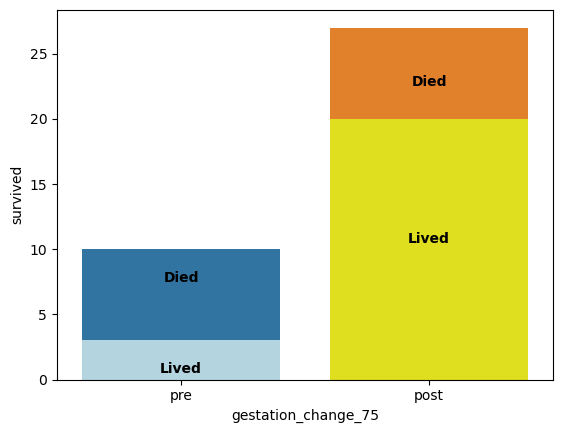

In [26]:
sns.barplot(data=repro2, x='gestation_change_75', y='total_born', order=['pre', 'post'])
sns.barplot(data=repro2, x='gestation_change_75', y='survived', order=['pre', 'post'], 
           palette=['lightblue', 'yellow'])

plt.text(0, 7.5, "Died", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(1, 22.5, "Died", horizontalalignment='center', size='medium', color='k', weight='semibold')
plt.text(0, 0.5, "Lived", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.text(1, 10.5, "Lived", horizontalalignment='center', size='medium', color='k', weight='semibold')
plt.savefig('../figures/repro_gestation75.svg', dpi=150, bbox_inches='tight')

In [27]:
repro

,dam_name,offspring_produced,birth_date,approx_mating,mating_change,date_changed,days_from_change,gestation_change_75,gestation_change_50,total_born,survived,percent_survival,died,offspring_notes,dam_notes
0,Reba,N,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,arrived 10/21/2020; partner is Chrome
1,Asami,Y,2021-10-30,5/31/21,pre,6/25/21,-127.0,post,post,2,1.0,50.0,1.0,NaN,transferred to J1 from MGH 5/3/2021; partner i...
2,Asami,Y,2022-04-04,11/3/21,post,6/25/21,-283.0,post,post,2,2.0,100.0,0.0,NaN,NaN
3,Toph,Y,2021-07-21,2/19/21,pre,6/25/21,-26.0,pre,pre,3,2.0,67.0,1.0,NaN,transferred to J1 from MGH 1/15/2021; partner ...
4,Toph,Y,2021-12-24,7/25/21,post,6/25/21,-182.0,post,post,2,1.0,50.0,1.0,1 alive,"weight loss, lethargy, diah event 2/14/2022- 2..."
5,Toph,Y,2022-08-01,3/2/22,post,6/25/21,-402.0,post,post,3,2.0,67.0,1.0,1 euthanized - fell,NaN
6,Ellen,Y,2021-10-10,5/11/21,pre,6/25/21,-107.0,pre,post,3,0.0,0.0,3.0,NaN,transferred to J1 from MGH 12/7/2020; partner ...
7,Ellen,Y,2022-04-19,11/18/21,post,6/25/21,-298.0,post,post,2,2.0,100.0,0.0,"rejected by mother, hand reared",NaN
8,Rene,Y,2021-08-22,3/23/21,pre,6/25/21,-58.0,pre,pre,3,0.0,0.0,3.0,NaN,transferred to J1 from MGH 12/15/2020; partner...
9,Tammy,Y,2022-04-11,11/10/21,post,6/25/21,-290.0,post,post,3,2.0,67.0,1.0,NaN,arrived 10/21/2020; partner is Bane


In [31]:
repro['offspring_produced2'] = repro['offspring_produced '].replace({'Y': 1, 'N': 0})

In [32]:
repro

,dam_name,offspring_produced,birth_date,approx_mating,mating_change,date_changed,days_from_change,gestation_change_75,gestation_change_50,total_born,survived,percent_survival,died,offspring_notes,dam_notes,offspring_produced2
0,Reba,N,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,arrived 10/21/2020; partner is Chrome,0
1,Asami,Y,2021-10-30,5/31/21,pre,6/25/21,-127.0,post,post,2,1.0,50.0,1.0,NaN,transferred to J1 from MGH 5/3/2021; partner i...,1
2,Asami,Y,2022-04-04,11/3/21,post,6/25/21,-283.0,post,post,2,2.0,100.0,0.0,NaN,NaN,1
3,Toph,Y,2021-07-21,2/19/21,pre,6/25/21,-26.0,pre,pre,3,2.0,67.0,1.0,NaN,transferred to J1 from MGH 1/15/2021; partner ...,1
4,Toph,Y,2021-12-24,7/25/21,post,6/25/21,-182.0,post,post,2,1.0,50.0,1.0,1 alive,"weight loss, lethargy, diah event 2/14/2022- 2...",1
5,Toph,Y,2022-08-01,3/2/22,post,6/25/21,-402.0,post,post,3,2.0,67.0,1.0,1 euthanized - fell,NaN,1
6,Ellen,Y,2021-10-10,5/11/21,pre,6/25/21,-107.0,pre,post,3,0.0,0.0,3.0,NaN,transferred to J1 from MGH 12/7/2020; partner ...,1
7,Ellen,Y,2022-04-19,11/18/21,post,6/25/21,-298.0,post,post,2,2.0,100.0,0.0,"rejected by mother, hand reared",NaN,1
8,Rene,Y,2021-08-22,3/23/21,pre,6/25/21,-58.0,pre,pre,3,0.0,0.0,3.0,NaN,transferred to J1 from MGH 12/15/2020; partner...,1
9,Tammy,Y,2022-04-11,11/10/21,post,6/25/21,-290.0,post,post,3,2.0,67.0,1.0,NaN,arrived 10/21/2020; partner is Bane,1
